In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import norm
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../DataSets/LP_Train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#  Visualize and identify missing values in the dataset.

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df=df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [8]:
df.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [9]:
df.Dependents=df.Dependents.replace("[3+]","3",regex=True).astype('float64')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.Dependents.unique()

array([ 1.,  0.,  2., 33.])

In [11]:
df.CoapplicantIncome.unique()

array([1.50800000e+03, 0.00000000e+00, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 8.10600000e+03, 2.84000000e+03, 1.08600000e+03,
       5.62500000e+03, 1.91100000e+03, 2.25300000e+03, 1.04000000e+03,
       1.66700000e+03, 3.00000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 1.88100000e+03, 2.53100000e+03, 2.11800000e+03,
       4.16700000e+03, 2.90000000e+03, 5.65400000e+03, 1.82000000e+03,
       2.30200000e+03, 9.97000000e+02, 3.54100000e+03, 3.26300000e+03,
       3.80600000e+03, 1.03000000e+03, 1.12600000e+03, 3.60000000e+03,
      

In [12]:
df.CoapplicantIncome=df.CoapplicantIncome.astype('int64')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [13]:
df.CoapplicantIncome.unique()

array([ 1508,     0,  2358,  4196,  1516,  2504,  1526, 10968,   700,
        8106,  2840,  1086,  5625,  1911,  2253,  1040,  1667,  3000,
        1459,  7210,  1668,  1213,  2336,  3440,  2275,  1644,  1167,
        1591,  2200,  2250,  2859,  3796,  3449,  4595,  2254,  3066,
        1875,  1774,  4750,  3022,  4000,  1881,  2531,  2118,  4167,
        2900,  5654,  1820,  2302,   997,  3541,  3263,  3806,  1030,
        1126,  3600,   754,  2283,  2142,  8980,  2014,  3850,  1929,
        7750,  3500,  1430,  2083,  2034,  4486,  1425,  1666,   830,
        3750,  1041,  1280,  1447,  3333,   736,  1964,  1619, 11300,
        1451,  7250,  2583,  2500,  1083,  1250,  3021,   983,  1800,
        1775,  1717,  2791,  1695,  2054,  1779,  1260,  5000,  1983,
        5701,  1300,  4417,  4333,  1843,  1868,  3890,  2167,  7101,
        2100,  2209,  3447,  1387,  1811,  1560,  1857,  2223,  1842,
        3274,  2426,   800,   985,  3053,  2000,  2416,  3334,  2541,
        2925,  2934,

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [15]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [16]:

df.Loan_Status=df.Loan_Status.replace("[N]","No",regex=True)
df.Loan_Status=df.Loan_Status.replace("[Y]","yes",regex=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,yes
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,yes
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,yes
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,yes
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,yes
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,yes
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,yes


In [17]:
df.corr(numeric_only=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.147105,-0.017556,0.125723,-0.072404,-0.061797
ApplicantIncome,0.147105,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.017556,-0.112588,1.000000,0.190740,-0.005773,-0.008692
LoanAmount,0.125723,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.072404,-0.010838,-0.005773,0.050867,1.000000,0.032937
Credit_History,-0.061797,-0.056152,-0.008692,-0.040773,0.032937,1.000000


In [18]:

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['IsHighIncome'] = df['TotalIncome'] > 5000
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IsHighIncome
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,No,6091,True
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,yes,3000,False
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,yes,4941,False
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,yes,6000,True
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,yes,9613,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,yes,2900,False
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,yes,4106,False
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,yes,8312,True
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,yes,7583,True


In [19]:
df.IsHighIncome.unique()

array([ True, False])

# Perform initial descriptive statistics on numerical columns (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History).

In [20]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,3.339583,5364.231250,1581.091667,144.735417,342.050000,0.854167,6945.322917
std,9.105694,5668.251251,2617.692797,80.508164,65.212401,0.353307,5969.949565
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,1442.000000
25%,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,4148.000000
50%,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,5422.500000
75%,2.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,7672.500000
max,33.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,81000.000000


# Analyze the distribution of categorical columns (Gender, Married, Dependents, Education, Self_Employed, Property_Area)

In [21]:
df.Gender.value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [22]:
df.Married.value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [23]:
df.Dependents.value_counts()

Dependents
0.0     274
2.0      85
1.0      80
33.0     41
Name: count, dtype: int64

In [24]:
df.Education.value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [25]:
df.Self_Employed.value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [26]:
df.Property_Area.value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

# Decide on strategies to handle missing data (e.g., Fill in missing numbers with estimates for numerical columns, use the most common category for  missing values in categorical columns, or remove data that is missing too much information.")

#### It is Not Possible to Fill Missing Data Because the Numerical Parameters of This Data Are Very Crucial And Important For Approving The Loan. If they Are Filled then the Predicted Value Will Come Which is not what we want , and the basis of  prediction we cannot approve the loan, So We Drop the Missing or Null Values


# Explore the relationship between loan approval(Status) and gender 

In [27]:
pd.crosstab(index=df.Gender,columns=df.Loan_Status,margins =True)


Loan_Status,No,yes,All
Gender,,,
Female,32,54,86
Male,116,278,394
All,148,332,480


#### According to the data,
#### Loan of 63% female applicants has been successfully Approved, 
#### 37% rejected are female applicants for Loan.
#### REASON FOR REJECTION IS NOT MATCHED THE REQUIREMENT THAT BANK NEEDED FROM THEM

#### AND   
                                               
#### Loan of 70.50% male applicants has been successfully Aporoved, 
#### 29.50% rejected are male applicants for Loan.
#### REASON FOR REJECTION IS NOT MATCHED THE REQUIREMENT THAT BANK NEEDED FROM THEM

#### As Per All Applicants For Loan in the Data Ratio are, 

#### Loan_Approval Ratio = 6.9/10,

#### Loan_Rejection Ratio = 3.1/10

# Analyze how marital status affects loan approval rates.

In [28]:
pd.crosstab(index=df.Married,columns=df.Loan_Status,margins =True)

Loan_Status,No,yes,All
Married,,,
No,64,105,169
Yes,84,227,311
All,148,332,480


####  For unmarried applicants:
####  Approval Rate (Unmarried)=105/169*100= 62.13%

####  For married applicants:
####  Approval Rate (Married)=84/227*100= 72.99%


# Examine the influence of the number of dependents on loan approval.

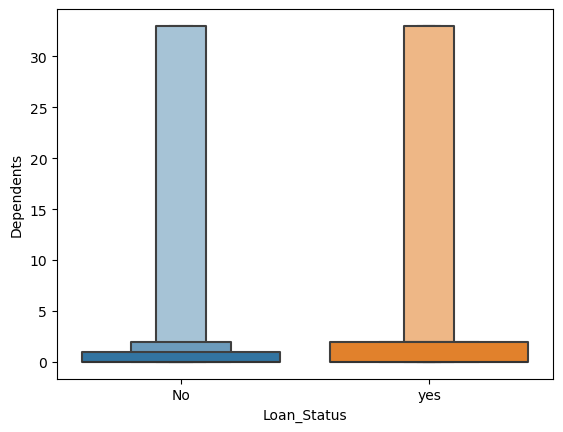

In [29]:
sb.boxenplot(x=df.Loan_Status,y=df.Dependents)
plt.show()

#  Investigate loan approval by education background

In [30]:
pd.crosstab(index=df.Loan_Status,columns=df.Education,margins =True)

Education,Graduate,Not Graduate,All
Loan_Status,,,
No,112,36,148
yes,271,61,332
All,383,97,480


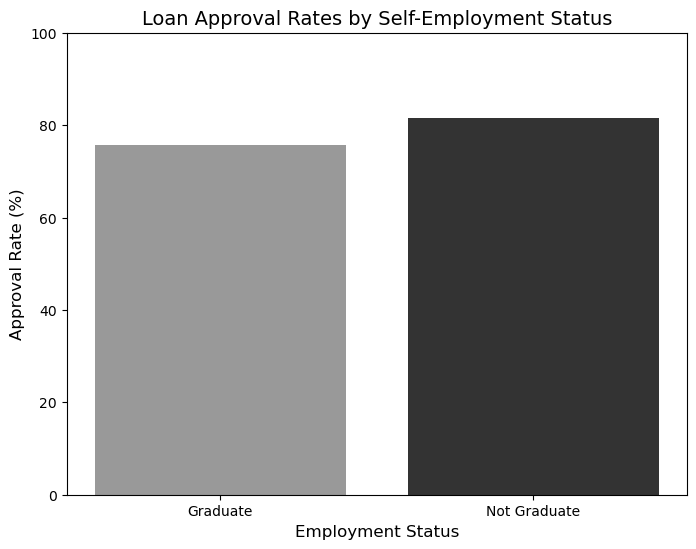

In [31]:
Acad_Type = ['Graduate', 'Not Graduate']
approval_rates = [112 / 148 * 100, 271 / 332 * 100]
plt.figure(figsize=(8, 6))
plt.bar(Acad_Type, approval_rates, color=['Grey', 'Black'], alpha=0.8)
plt.title("Loan Approval Rates by Self-Employment Status", fontsize=14)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.xlabel("Employment Status", fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Higher approval rate (71%).
#### Indicates that education level might influence loan approval

#### Non Graduates:
#### Lower approval rate (63%).
#### Suggests that non-graduates may face challenges for meeting loan criteria, 

# Assess the impact of self-employment status on loan approval. 

In [32]:
 df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

Loan_Status,No,yes
Self_Employed,,
No,125,289
Yes,23,43


####  Not Self-Employed:
#### Approval Rate (Not Self-Employed)=289/414*100=69.81%

#### Self-Employed:
#### Approval Rate (Self-Employed)=43/66*100=65.15%

#### Not Self-Employed:
#### Loan approval rate: ~70%.
#### Higher likelihood of loan approval, potentially due to stable, documented income.

#### Self-Employed:
#### Loan approval rate: ~65%.



In [33]:
 df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()

Loan_Status,No,yes
Self_Employed,,
No,125,289
Yes,23,43


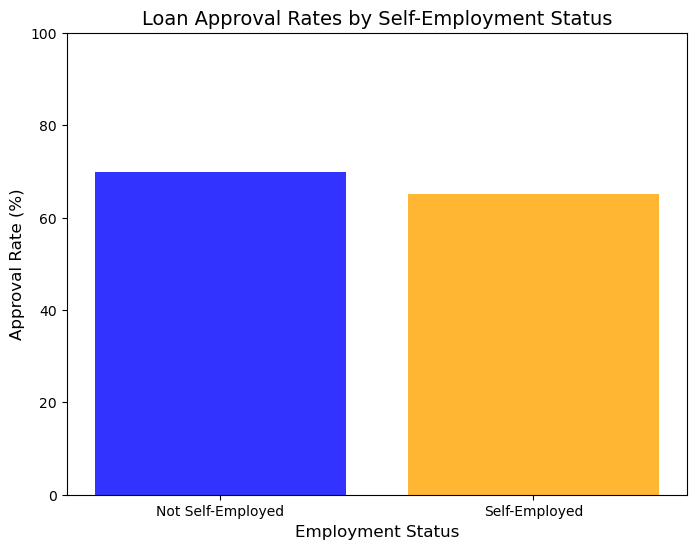

In [34]:

Employed_Type = ['Not Self-Employed', 'Self-Employed']
approval_rates = [289 / 414 * 100, 43 / 66 * 100]
plt.figure(figsize=(8, 6))
plt.bar(Employed_Type, approval_rates, color=['blue', 'orange'], alpha=0.8)
plt.title("Loan Approval Rates by Self-Employment Status", fontsize=14)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.xlabel("Employment Status", fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Visualize the relationship between applicant income and loan approval using boxplots.

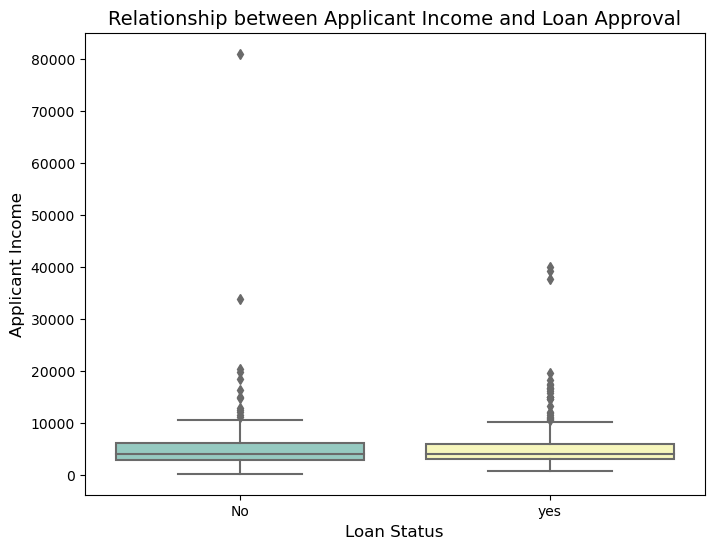

In [35]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='Set3')
plt.title('Relationship between Applicant Income and Loan Approval', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Applicant Income', fontsize=12)
plt.show()

# Examine how co-applicant income influences loan approval.

In [36]:
c=df.Loan_Status.value_counts()
c

Loan_Status
yes    332
No     148
Name: count, dtype: int64

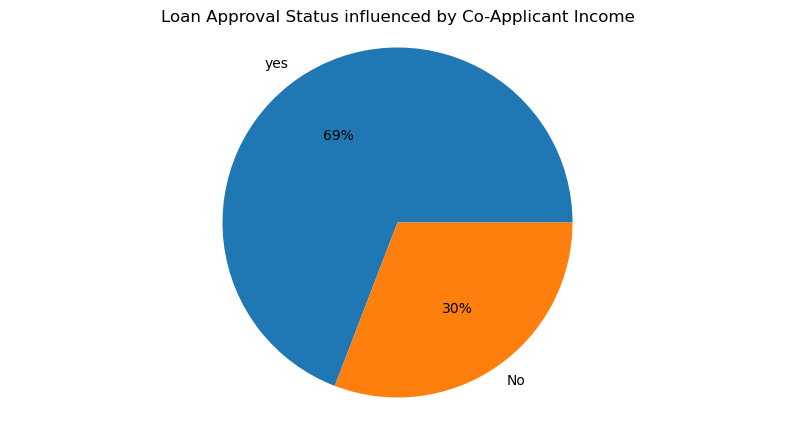

In [37]:
plt.figure(figsize=[10,5])
plt.pie(c.values,labels=c.index,autopct='%d%%')

plt.title("Loan Approval Status influenced by Co-Applicant Income")
plt.axis('equal')
plt.show()

# Perform correlation analysis between applicant income, co-applicant income, and loan amount

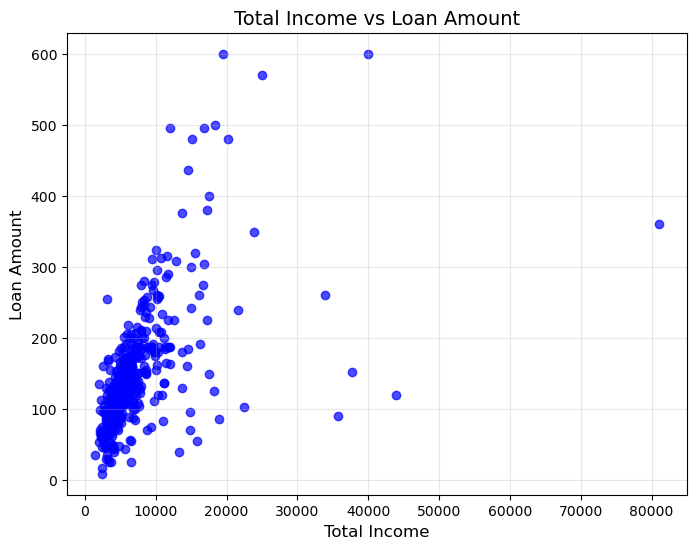

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalIncome'], df['LoanAmount'], alpha=0.7, color='blue')
plt.title("Total Income vs Loan Amount", fontsize=14)
plt.xlabel("Total Income", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Compare loan amounts requested by different demographic groups (gender, marital status, education)

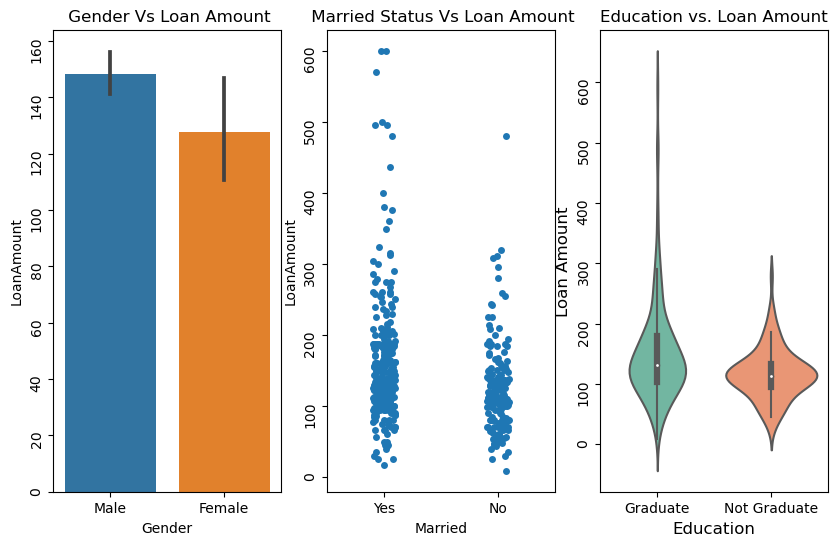

In [39]:
fig=plt.figure(figsize=[10,6])
x1=fig.add_subplot(131)
plt.title(" Gender Vs Loan Amount")
sb.barplot(x=df.Gender,y=df.LoanAmount)
plt.yticks(rotation=90)

x2=fig.add_subplot(132)
plt.title(" Married Status Vs Loan Amount")
sb.stripplot(x=df.Married,y=df.LoanAmount)
plt.yticks(rotation=90)

x3=fig.add_subplot(133)
sb.violinplot(x='Education', y='LoanAmount', data=df, palette='Set2')
plt.title('Education vs. Loan Amount', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.yticks(rotation=90)
plt.show()



# Examine the loan approval rate for applicants with different credit histories.

In [40]:
pd.crosstab(index=df.Credit_History,columns=df.Loan_Status,margins =True)

Loan_Status,No,yes,All
Credit_History,,,
0.0,63,7,70
1.0,85,325,410
All,148,332,480


#### Credit_History With 0.0
#### Approval Rate =7/70*100=10%


#### Credit_History With 1.0
#### Approval Rate = 90%


#### Credit_History With 0.0
#### Loan approval rate: 10%.


#### Credit_History With 1.0
#### Loan approval rate: 90%


# Analyze the relationship between loan term (Loan_Amount_Term) and loanapproval rate.
                             

In [41]:
df.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

Analyze the relationship between loan term (Loan_Amount_Term) and loanapproval rate.

In [42]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IsHighIncome
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360,1.0,Rural,No,6091,True
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360,1.0,Urban,yes,3000,False
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360,1.0,Urban,yes,4941,False
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360,1.0,Urban,yes,6000,True
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,360,1.0,Urban,yes,9613,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360,1.0,Rural,yes,2900,False
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,180,1.0,Rural,yes,4106,False
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360,1.0,Urban,yes,8312,True
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360,1.0,Urban,yes,7583,True


In [43]:
df.Loan_Amount_Term.unique()

array([360, 120, 180,  60, 300, 480, 240,  36,  84], dtype=int64)

In [44]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(360, 36)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(120, 12)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(180, 18)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(60, 6)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(300, 30)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(480, 48)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(240, 24)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IsHighIncome
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,36,1.0,Rural,No,6091,True
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,36,1.0,Urban,yes,3000,False
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,36,1.0,Urban,yes,4941,False
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,36,1.0,Urban,yes,6000,True
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,36,1.0,Urban,yes,9613,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,36,1.0,Rural,yes,2900,False
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,18,1.0,Rural,yes,4106,False
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,36,1.0,Urban,yes,8312,True
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,36,1.0,Urban,yes,7583,True


In [45]:
df.Loan_Amount_Term.unique()

array([36, 12, 18,  6, 30, 48, 24, 84], dtype=int64)

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IsHighIncome
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,36,1.0,Rural,No,6091,True
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,36,1.0,Urban,yes,3000,False
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,36,1.0,Urban,yes,4941,False
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,36,1.0,Urban,yes,6000,True
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196,267.0,36,1.0,Urban,yes,9613,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,36,1.0,Rural,yes,2900,False
610,LP002979,Male,Yes,33.0,Graduate,No,4106,0,40.0,18,1.0,Rural,yes,4106,False
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,36,1.0,Urban,yes,8312,True
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,36,1.0,Urban,yes,7583,True


# Analyze the relationship between loan term (Loan_Amount_Term) and loan approval rate.

In [47]:
pd.crosstab(index=df.Loan_Amount_Term,columns=df.Loan_Status,margins =True)

Loan_Status,No,yes,All
Loan_Amount_Term,,,
6,0,2,2
12,0,3,3
18,12,24,36
24,1,1,2
30,5,4,9
36,121,292,413
48,8,4,12
84,1,2,3
All,148,332,480


####  Short-Term Loans (6 and 12 months):
#### These have a 100% approval rate


#### Medium-Term Loans (18, 24, and 30 months):
#### Approval rates by:
#### 18 months: 66.67%
#### 24 months: 50.00%
#### 30 months: 44.44%
    
#### Most Common Term (36 months):
#### The 36-month loan term is the most common, with 413 applications, and has an approval rate of 70.71%.

#### Long-Term Loans (48 and 84 months):
#### Approval rates are lower:
#### 48 months: 33.33%
#### 84 months: 66.67% (Few Applicants)

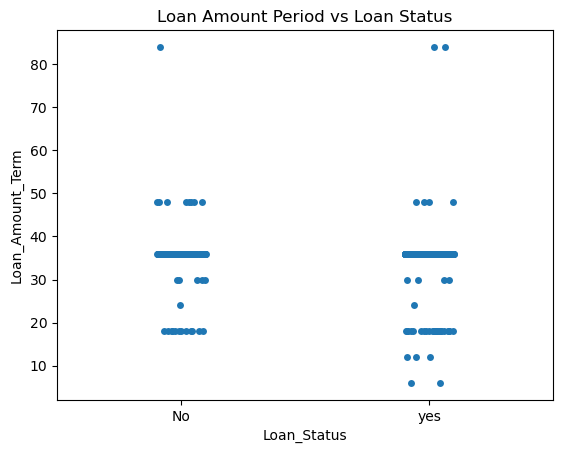

In [48]:
sb.stripplot(x=df.Loan_Status,y=df.Loan_Amount_Term)
plt.title("Loan Amount Period vs Loan Status")
plt.show()

# Investigate the interaction between credit history and loan term.

In [49]:
pd.crosstab(index=df.Loan_Amount_Term,columns=df.Credit_History,margins =True)

Credit_History,0.0,1.0,All
Loan_Amount_Term,,,
6,0,2,2
12,0,3,3
18,10,26,36
24,0,2,2
30,3,6,9
36,54,359,413
48,3,9,12
84,0,3,3
All,70,410,480


#### Loan Term Preference by Credit History:

#### Applicants with Credit_History = 1.0 dominate all loan terms, especially the 36-month term (359 out of 413 total applications).

#### Applicants with Credit_History = 0.0 are concentrated in longer terms like 18 months (10 loans) and 36 months (54 loans).

#### Short-Term Loans:
#### Only applicants with Credit_History = 1.0 are approved for short-term loans (6 and 12 months).

#### 36-Month Term Dominance:
#### The 36-month term accounts for the majority of loans, regardless of credit history. 
#### However, approval is heavily skewed towards Credit_History = 1.0.

#### Lower Loan Approval for Credit_History = 0.0:
#### Across all terms, applicants with Credit_History = 0.0 are significantly less likely to have their loans approved.

# Analyze the distribution of loan approvals across different property areas
# (Urban, Semiurban, Rural).

In [50]:
df.groupby(['Property_Area', 'Loan_Status']).size().unstack()

Loan_Status,No,yes
Property_Area,,
Rural,54,85
Semiurban,42,149
Urban,52,98


##### Approval Rate Calculation
### For each property area:
####    . Rular = 61.2%
####    .Semi-Urban = 78%
####    .Urban = 65.3%

In [51]:
d=df.Property_Area.value_counts()
d

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

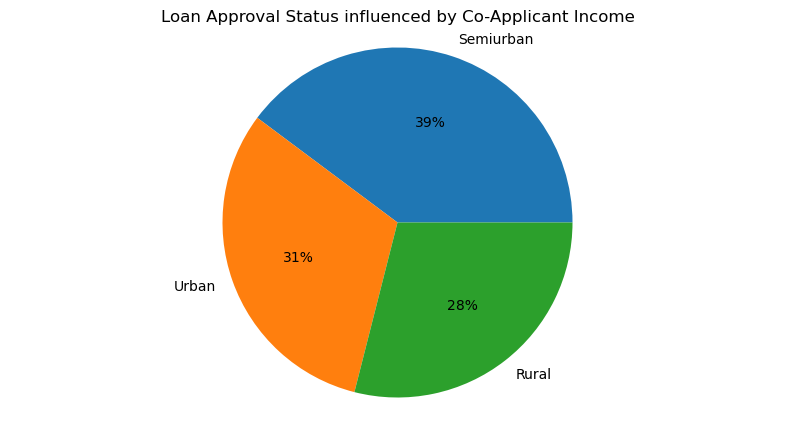

In [52]:
plt.figure(figsize=[10,5])
plt.pie(d.values,labels=d.index,autopct='%d%%')

plt.title("Loan Approval Status influenced by Co-Applicant Income")
plt.axis('equal')
plt.show()

#  # Investigate if property area has a significant impact on loan amounts requested.

In [53]:
df.LoanAmount.nunique()

186

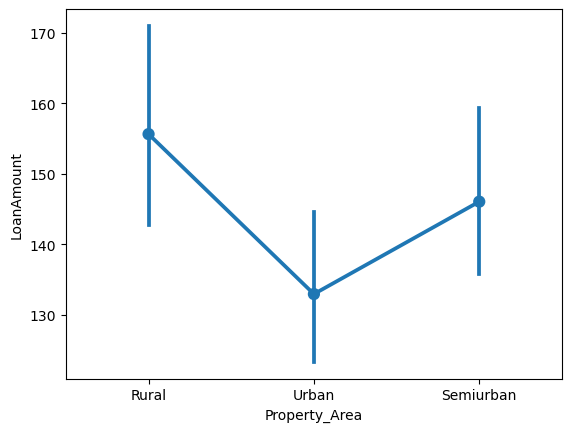

In [54]:
sb.pointplot(x=df.Property_Area,y=df.LoanAmount)
plt.show()